# Examples for the DLA Survey Class (v1.4.1)

In [1]:
%matplotlib inline

In [2]:
# imports
import seaborn as sns; sns.set_style("white")

import imp, os
from imp import reload
import numpy as np

import datetime

from pkg_resources import resource_filename

from matplotlib import pyplot as plt

from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import Range1d
from bokeh.layouts import row

output_notebook()

from astropy.table import Table

from pyigm.surveys.dlasurvey import DLASurvey
from pyigm.surveys import dlasurvey as dlasrv
from pyigm.abssys.igmsys import AbsSubSystem

Loading BokehJS ...

read_sets: Using set file -- 
  /home/xavier/local/Python/linetools/linetools/lists/sets/llist_v1.2.ascii
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12


/home/xavier/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/astropy/table/column.py:1096: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  ma.MaskedArray.__setitem__(self, index, value)
/home/xavier/local/Python/linetools/linetools/lists/linelist.py:402: RuntimeWarning: divide by zero encountered in log10
  self._extra_table['log(w*f)'] = np.log10(qm_strength)


## Instantiate

In [3]:
dlas = DLASurvey(ref='null')

### H100  (Neeleman, M. et al. 2013, ApJ, 769, 54)

In [4]:
reload(dlasrv)
print(datetime.datetime.now())
h100 = dlasrv.DLASurvey.load_H100()
print(datetime.datetime.now())
h100

2017-09-24 19:08:08.390484
H100: Loading summary file /home/xavier/local/Python/pyigm/pyigm/data/DLA/H100/H100_DLA.fits
H100: Loading ions file /home/xavier/local/Python/pyigm/pyigm/data/DLA/H100/H100_DLA_ions.json
H100: Loading systems.  This takes ~90s
Loading systems from /home/xavier/local/Python/pyigm/pyigm/data/DLA/H100/H100_DLA_sys.tar.gz
Skipping a likely folder: SYS


/home/xavier/local/Python/linetools/linetools/spectralline.py:200: UserWarning: Redshift not input.  Setting to 0 for zLimits
  warnings.warn("Redshift not input.  Setting to 0 for zLimits")
/home/xavier/local/Python/linetools/linetools/spectralline.py:117: UserWarning: Key Id not in your input dict
  warnings.warn("Key {:s} not in your input dict".format(key))
/home/xavier/local/Python/linetools/linetools/isgm/abscomponent.py:237: UserWarning: No stars provided.  Adding one because Ej > 0.
  warnings.warn("No stars provided.  Adding one because Ej > 0.")


2017-09-24 19:09:57.395952


<IGMSurvey: nsys=100, type=DLA, ref=Neeleman+13>

#### Grab spectra (be patient; may require Internet access)

In [5]:
h100 = DLASurvey.load_H100(grab_spectra=True)

H100: Loading summary file /home/xavier/local/Python/pyigm/pyigm/data/DLA/H100/H100_DLA.fits
H100: Loading ions file /home/xavier/local/Python/pyigm/pyigm/data/DLA/H100/H100_DLA_ions.json
H100: Loading systems.  This takes ~90s
Loading systems from /home/xavier/local/Python/pyigm/pyigm/data/DLA/H100/H100_DLA_sys.tar.gz
Skipping a likely folder: SYS


/home/xavier/local/Python/linetools/linetools/spectralline.py:200: UserWarning: Redshift not input.  Setting to 0 for zLimits
  warnings.warn("Redshift not input.  Setting to 0 for zLimits")
/home/xavier/local/Python/linetools/linetools/spectralline.py:117: UserWarning: Key Id not in your input dict
  warnings.warn("Key {:s} not in your input dict".format(key))
/home/xavier/local/Python/linetools/linetools/isgm/abscomponent.py:237: UserWarning: No stars provided.  Adding one because Ej > 0.
  warnings.warn("No stars provided.  Adding one because Ej > 0.")


H100: Using files in /home/xavier/local/Python/pyigm/pyigm/data/DLA/H100/Spectra/


/home/xavier/local/Python/pyigm/pyigm/surveys/dlasurvey.py:223: UserWarning: All of these spectra are in igmspec at https://github.com/specdb/specdb
  warnings.warn("All of these spectra are in igmspec at https://github.com/specdb/specdb")


#### Metallicity

In [6]:
h100.ZH

array([-0.72, -1.53, -1.68, -1.01, -1.39, -1.41, -1.43, -1.2 , -0.24,
       -1.83, -2.54, -0.61, -0.88, -1.72, -1.49, -1.08, -1.39, -1.11,
       -1.27, -0.27, -1.54, -2.28, -1.83, -2.07, -1.15, -1.68, -1.5 ,
       -1.11, -1.46, -1.33, -0.82, -2.52, -0.67, -1.56, -1.69, -1.64,
       -2.56, -1.51, -1.08, -1.45, -0.83, -0.82, -1.97, -0.94, -1.99,
       -1.88, -2.27, -1.6 , -1.68, -0.99, -1.74, -1.8 , -1.9 , -1.6 ,
       -1.25, -1.38, -0.64, -0.74, -2.38, -2.35, -2.66, -1.75, -1.  ,
       -0.79, -1.43, -1.54, -1.39, -1.65, -1.54, -1.34, -1.75, -2.27,
       -1.37, -1.31, -0.89, -1.94, -0.75, -1.42, -1.31, -0.94, -2.24,
       -1.49, -1.7 , -1.65, -0.7 , -1.81, -0.38, -2.25, -2.17, -0.71,
       -0.61, -1.82, -1.68, -0.55, -1.96, -0.47, -1.69, -0.64, -1.92, -2.01])

## Simple Attributes

In [7]:
h100.nsys

100

In [8]:
h100.NHI[0:10]

array([ 20.7 ,  20.3 ,  21.41,  20.92,  20.3 ,  21.37,  20.5 ,  21.26,
        20.38,  20.45])

In [9]:
h100.name[0:5]

array(['Q2359-02_z2.095', 'Q2359-02_z2.154', 'Q0000-2619_z3.390',
       'BR0019-15_z3.439', 'J0040-0915_z4.739'], 
      dtype='<U18')

## Column Densities

In [10]:
SiII_clms = h100.ions((14,2))
SiII_clms[0:5]

name,Z,ion,A,Ej,z,vmin,vmax,flag_N,logN,sig_logN
,,,,1 / cm,,km / s,km / s,,,
str32,int64,int64,int64,float64,float64,float64,float64,int64,float64,float64
Q2359-02_z2.095,14,2,0,0.0,2.09507,-170.290583856,99.7094161443,1,15.486,0.02
Q2359-02_z2.154,14,2,0,0.0,2.153934,-170.0,180.0,1,14.277,0.015
Q0000-2619_z3.390,14,2,0,0.0,3.3901,-70.0000000001,100.0,1,15.088,0.012
BR0019-15_z3.439,14,2,0,0.0,3.43886,-170.0,100.0,1,15.419,0.054
J0040-0915_z4.739,14,2,0,0.0,4.7394,-40.0,70.0,2,14.178,0.727


In [11]:
gdSiII = SiII_clms['flag_N']>0
np.sum(gdSiII)

98

In [12]:
h100.name[~gdSiII]

array(['BRI0952-01_z4.024', 'Q1055+46_z3.317'], 
      dtype='<U18')

## Simple Plots

In [13]:
# NHI
p_NHI = figure(plot_width=400, plot_height=400, title='H100 NHI')#,background_fill="#E8DDCB")
hist, edges = np.histogram(h100.NHI, range=(20.2, 22), density=True, bins=20)
p_NHI.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],fill_color='blue')
p_NHI.xaxis.axis_label = 'N_HI'
# z
p_z = figure(plot_width=400, plot_height=400, title='H100 z')#,background_fill="#E8DDCB")
hist, edges = np.histogram(h100.zabs, range=(1.6, 5.0), density=True, bins=20)
p_z.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],fill_color='red')
p_z.xaxis.axis_label = 'z_DLA'
# Show
show(row(p_NHI,p_z))

----

## SDSS DLAs (DR5) -- Prochaska & Wolfe 2009, ApJ, 696, 1543

### Load

In [14]:
sdss = DLASurvey.load_SDSS_DR5(sample='all')
sdss

SDSS-DR5: Loading DLA file /home/xavier/local/Python/pyigm/pyigm/data/DLA/SDSS_DR5/dr5_alldla.fits.gz
SDSS-DR5: Loading QSOs file /home/xavier/local/Python/pyigm/pyigm/data/DLA/SDSS_DR5/dr5_dlagz_s2n4.fits


<IGMSurvey: nsys=1182, type=DLA, ref=SDSS-DR5 (PW09), nsightlines=7482>

In [15]:
sdss_stat = DLASurvey.load_SDSS_DR5()
sdss_stat

SDSS-DR5: Loading DLA file /home/xavier/local/Python/pyigm/pyigm/data/DLA/SDSS_DR5/dr5_alldla.fits.gz
SDSS-DR5: Loading QSOs file /home/xavier/local/Python/pyigm/pyigm/data/DLA/SDSS_DR5/dr5_dlagz_s2n4.fits
SDSS-DR5: Performing stats


/home/xavier/local/Python/pyigm/pyigm/surveys/dlasurvey.py:891: UserWarning: Resetting mask to None.  Be careful here
  True = statistical


SDSS-DR5: Loaded


<IGMSurvey: nsys=737, type=DLA, ref=SDSS-DR5 (PW09), nsightlines=7482>

In [16]:
sdss_stat.sightlines[0:5]

PLATE,FIB,RA,DEC,FLG_BAL,IQSO,MAG,S2N,Z_START,Z_END,ZEM,DX
,,deg,deg,,,,,,,,
int32,int32,float64,float64,int16,int32,float64,float64,float64,float64,float64,float64
266,5,146.93861,-0.68701194,1,0,19.341999054,4.94595003128,2.39664643878,2.74649000168,2.8287498951,1.17426266257
266,92,146.22601,-0.72509875,0,4,19.0820007324,8.54980564117,2.20000004768,2.25759506226,2.29049992561,0.184012498912
270,254,152.23239,-0.97123272,0,9,19.0230007172,7.49763822556,2.30636157714,3.0556242466,3.09659004211,2.56581152274
271,391,154.14992,0.14750838,0,16,18.0650005341,18.982629776,2.20000004768,2.25551605225,2.28839993477,0.177634457341
271,166,154.45375,-0.52347949,0,17,18.9650001526,10.8409719467,2.20000004768,2.25027894974,2.28310990334,0.158514320617


### $g(z)$

In [17]:
zeval, gz = sdss_stat.calculate_gz()

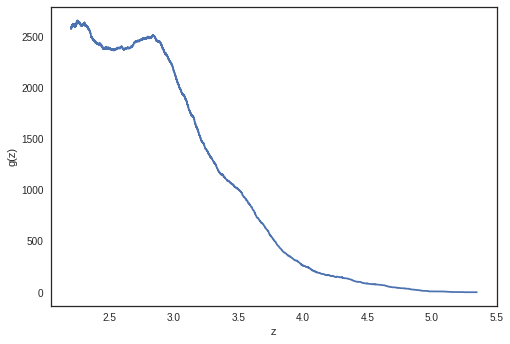

In [18]:
plt.clf()
plt.plot(zeval, gz)
plt.xlabel('z')
plt.ylabel('g(z)')
plt.show()

### Binned stats

#### $\ell(X)$

In [19]:
lX, lX_lo, lX_hi= sdss_stat.binned_lox([2., 2.5, 3])

In [20]:
lX, lX_lo, lX_hi

(array([ 0.04625038,  0.06430632]),
 array([ 0.00434442,  0.00393302]),
 array([ 0.00477301,  0.00418125]))

#### $\rho_{\rm HI}$

In [21]:
rho, rho_lo, rho_hi = sdss_stat.binned_rhoHI([2., 2.5, 3.], (20.3,23.))

In [22]:
rho/1e8, rho_lo, rho_hi

(<Quantity [ 0.50109093, 0.77673707] solMass / Mpc3>,
 <Quantity [  9844532.72342437, 12926489.76807207] solMass / Mpc3>,
 <Quantity [ 10074803.40773631, 13039660.50449806] solMass / Mpc3>)

#### $f(N,X)$

In [23]:
fN, fN_lo, fN_hi = sdss_stat.binned_fn([20.3, 20.5, 21., 21.5, 22.], [2, 2.5], log=True)

In [24]:
fN, fN_lo, fN_hi

(array([[-21.78294186],
        [-22.49859874],
        [-23.68148193],
        [-24.74575336]]), array([[ 0.0682087 ],
        [ 0.06395184],
        [ 0.1529649 ],
        [ 0.34125893]]), array([[ 0.06750842],
        [ 0.06336817],
        [ 0.14659368],
        [ 0.29506734]]))

### Peroux03  (Peroux et al. 2003, MNRAS, 346, 1103)

In [25]:
p03_statdla = DLASurvey.load_P03()#sample='all')
p03_statdla

Loading QSOs file /home/xavier/local/Python/pyigm/pyigm/data/DLA/P03/P03_zpath.fit


/home/xavier/local/Python/pyigm/pyigm/surveys/dlasurvey.py:891: UserWarning: Resetting mask to None.  Be careful here
  True = statistical


Loaded survey


<IGMSurvey: nsys=105, type=DLA, ref=P03, nsightlines=514>

### Guimaraes et al. 2009

In [26]:
g09_statdla = DLASurvey.load_G09()#sample='all')
g09_statdla

Loading QSOs file /home/xavier/local/Python/pyigm/pyigm/data/DLA/G09/G09_zpath.fit
Loaded survey


/home/xavier/local/Python/pyigm/pyigm/surveys/dlasurvey.py:891: UserWarning: Resetting mask to None.  Be careful here
  True = statistical


<IGMSurvey: nsys=38, type=DLA, ref=G09, nsightlines=77>

In [27]:
zeval, gz = g09_statdla.calculate_gz()

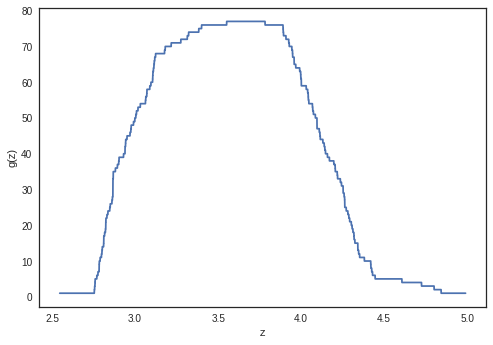

In [28]:
plt.clf()
plt.plot(zeval, gz)
plt.xlabel('z')
plt.ylabel('g(z)')
plt.show()
plt.close()

## GGG (Crighton et al. 2015, MNRAS, 452, 217)

In [29]:
ggg = DLASurvey.load_GGG()

Loading QSOs file /home/xavier/local/Python/pyigm/pyigm/data/DLA/GGG/GGG_QSO.dat
Loaded survey


/home/xavier/local/Python/pyigm/pyigm/surveys/dlasurvey.py:891: UserWarning: Resetting mask to None.  Be careful here
  True = statistical


In [30]:
ggg

<IGMSurvey: nsys=49, type=DLA, ref=GGG, nsightlines=163>

### XQ-100 (Sanchez-Ramirez et al. 2016, MNRAS, 456, 4488)

In [31]:
xq100_statdla = DLASurvey.load_XQ100()
xq100_statdla

Loading QSOs file /home/xavier/local/Python/pyigm/pyigm/data/DLA/XQ-100/XQ100_zpath.fit
Loaded survey


/home/xavier/local/Python/pyigm/pyigm/surveys/dlasurvey.py:891: UserWarning: Resetting mask to None.  Be careful here
  True = statistical


<IGMSurvey: nsys=36, type=DLA, ref=XQ-100, nsightlines=100>

#### $g(z)$

In [32]:
zeval, gz = xq100_statdla.calculate_gz()

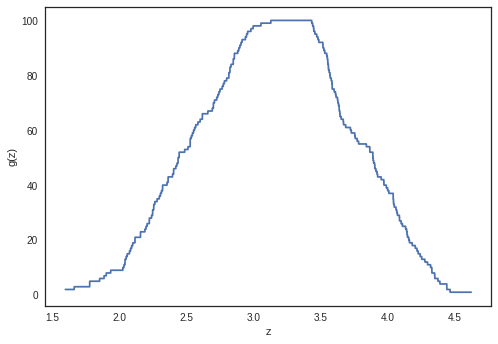

In [33]:
plt.clf()
plt.plot(zeval, gz)
plt.xlabel('z')
plt.ylabel('g(z)')
plt.show()
plt.close()

## HST -- (Neeleman et al. 2016)

In [34]:
hst16 = DLASurvey.load_HST16()
hst16

/home/xavier/local/Python/pyigm/pyigm/surveys/dlasurvey.py:891: UserWarning: Resetting mask to None.  Be careful here
  True = statistical


<IGMSurvey: nsys=4, type=DLA, ref=Neeleman+16, nsightlines=381>

In [35]:
hst16_all = DLASurvey.load_HST16(sample='all')  # Includes MgII-selected DLAs
hst16_all

<IGMSurvey: nsys=48, type=DLA, ref=Neeleman+16, nsightlines=596>